In [1]:
#  This is a tutorial code for SLP interface 
from data.SLP_RD import SLP_RD
import utils.vis as vis
import numpy as np
import cv2

In [2]:
# init dataset 
class pseudo_opts:
    SLP_fd = 'D:\SLP datasets\SLP\danaLab' # give your dataset folder here 
    sz_pch=[256, 256]
    fc_depth = 50
    cov_li = ['uncover']        # give the cover class you want here 

# SLP_rd_test = SLP_RD(pseudo_opts, phase='test')  # all test result
SLP_rd_test = SLP_RD(pseudo_opts, phase='train')  # all test result

# get image, joints and corresponding bounding box, this is frequently used to feed data to the data loader during training.

initializing SLP: 100%|██████████| 102/102 [00:07<00:00, 13.79it/s]


In [62]:
idx = 4100         # the index you want
RGB, jtA, bbA = SLP_rd_test.get_array_joints(idx_smpl=idx, mod='RGB')
depth, jtB, bbB = SLP_rd_test.get_array_joints(idx_smpl=idx, mod='depth')
PM, jt_PM, bb_PM = SLP_rd_test.get_array_joints(idx_smpl=idx, mod='PM')      # image version  
phyVec = SLP_rd_test.get_phy(idx=idx)
hA, wA = RGB.shape[:2]
hB, wB = depth.shape[:2] 
h_PM, w_PM = PM.shape[:2] 

IndexError: list index out of range

In [53]:
# resize for notebook readability 
h = 256 
scal_RGB = h/hA 
RGB_rsz = cv2.resize(RGB, (int(wA * h /hA), h))
scal_depth = h/hB
depth_rsz = cv2.resize(depth, (int(wB * h /hB), h))
depth_rsz_3c = np.stack((depth_rsz,)*3, axis=-1)
scal_PM = h/h_PM
PM_rsz = cv2.resize(PM, (int(w_PM*h/h_PM), h))
PM_rsz_3c = np.stack((PM_rsz,)*3, axis=-1)
img_cb_ori =  np.concatenate([RGB_rsz[...,::-1], depth_rsz_3c], axis=1)
# show the bb of RGB and bbox 

print('the joints of RGB {} is'.format(idx)) 
print(jtA)
print('the bounding box is') 
print(bbA)
print('physical parameters are')
print('weight {},  height {}, gender(1:male, 0:female) {}, bust {},	waist {}, hip {}， right upper arm {}， right lower arm {}， right upper leg {}， right lower leg {}'.format(*phyVec.tolist()))

# show raw images  
# print('show raw RGB and depth images')
# vis.ipyth_imshow(RGB_rsz[...,::-1])
# vis.ipyth_imshow(depth_rsz)
# print('the orig image pair without align') 
# vis.ipyth_imshow(img_cb_ori) 

the joints of RGB 4005 is
[[284.46013571 702.57718405  -1.        ]
 [286.19720102 613.98685327  -1.        ]
 [244.50763359 502.81467345  -1.        ]
 [348.73155216 506.28880407  -1.        ]
 [413.00296862 678.25826972  -1.        ]
 [326.14970314 796.37871077  -1.        ]
 [136.80958439 485.44402036  -1.        ]
 [161.12849873 386.43129771  -1.        ]
 [188.92154368 268.31085666  -1.        ]
 [352.20568278 257.8884648   -1.        ]
 [395.63231552 369.06064461  -1.        ]
 [446.0072095  466.33630195  -1.        ]
 [274.03774385 231.83248516  -1.        ]
 [282.7230704  134.55682782  -1.        ]]
the bounding box is
[-105.08473282   68.97463953  792.98625954  792.98625954]
physical parameters are
weight 70.4,  height 178.5, gender(1:male, 0:female) 1.0, bust 91.0,	waist 87.0, hip 99.0， right upper arm 25.5， right lower arm 22.4， right upper leg 44.2， right lower leg 41.0


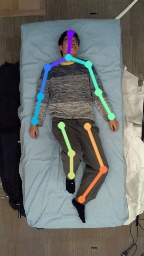

In [54]:
# show skel, correct 
jt_RGB_rsz = jtA.copy() * scal_RGB
jt_RGB_rsz[:,2] = 1
img_skel = vis.vis_keypoints(RGB_rsz[:,:,::-1], jt_RGB_rsz, SLP_rd_test.skels_idx)
vis.ipyth_imshow(img_skel)

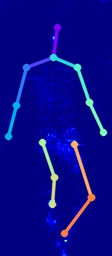

In [55]:
# show PM skels  
# PM_3c = np.stack((PM, )*3, axis=-1) 
PM_pseudo = cv2.applyColorMap(PM_rsz, cv2.COLORMAP_JET)     
jt_PM_rsz = jt_PM*scal_PM
jt_PM_rsz[:,2] = 1  # all visible 
img_skel = vis.vis_keypoints(PM_pseudo, jt_PM_rsz, SLP_rd_test.skels_idx) 
vis.ipyth_imshow(img_skel)

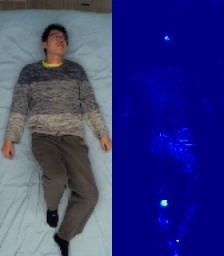

In [56]:
# align to PM 
RGB2PM = SLP_rd_test.get_array_A2B(idx=idx, modA='RGB', modB='PM')
RGB2PM = cv2.resize(RGB2PM, (int(84 * h /192), h))
img_cb = np.concatenate([RGB2PM[...,::-1], PM_pseudo], axis=1)
vis.ipyth_imshow(img_cb) 

get aligned image pair


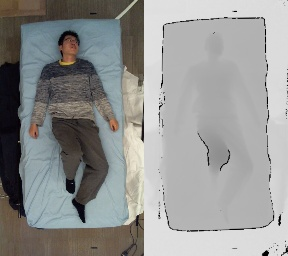

In [57]:
# align 
# get depth 2 RGB 
print('get aligned image pair') 
depth2RGB = SLP_rd_test.get_array_A2B(idx=idx, modA='depth', modB='RGB')
depth2RGB = cv2.resize(depth2RGB, (int(wA * h /hA), h))
depth2RGB_3c = np.stack((depth2RGB,)*3, axis=-1)
img_cb = np.concatenate([RGB_rsz[...,::-1], depth2RGB_3c], axis=1)
vis.ipyth_imshow(img_cb) 
